In [1]:
import nbimporter
import pandas as pd
import math
#import ace_tools as tools

In [2]:
from fct_usuelles import lire_graphe, afficher_graphe, visualiser_graphe_par_etape
from fct_usuelles import generate_cyclic_graph, generate_chain_graph, generate_spider_graph
from mtd_math import solver, solveur_gbp
from algo_recherche import recherche_profondeur, recherche_largeur, trouver_sequence_brulage, couverture_balle_beta

# 1

In [3]:
# 10 sommets (3.16)
#fichier = r'instances\Stranke94\Stranke94.mtx'

# 29 sommets (5.38)
#fichier = r'instances\bn-mouse_visual-cortex_1\bn-mouse_visual-cortex_1.mtx'

# 34 sommets (5,83)
fichier = r'instances\karate\karate.mtx'

# 7057 sommets (84.005)
#fichier = r'instances\fb-pages-government\fb-pages-government.mtx'

# 11631 sommets (107.84)
#fichier = r'instances\web-wiki-crocodile\web-wiki-crocodile.mtx'

# 196 591 sommets (443.38)
#fichier = r'instances\loc-gowalla_edges\loc-gowalla_edges.mtx'

graphe = lire_graphe(fichier)

In [4]:
# Graphe cyclique (4)
#graphe = generate_cyclic_graph(16)

# Graphe en chaîne (4)
#graphe = generate_chain_graph(16)

# Graphe en étoile/spider (4.58)
#graphe = generate_spider_graph(0, leg_length=4, num_legs=5)

In [5]:
#afficher_graphe(graphe)

---

## Methode mathematique

### Mthd 1

In [6]:
sommets, cout = solver(graphe)

Set parameter Username
Set parameter LicenseID to value 2601900
Academic license - for non-commercial use only - expires 2025-12-18


### Mthd 2

In [7]:
chemin, cout = solveur_gbp(graphe)

---

## Algo de recherche

In [8]:
etat_initial = {sommet: 0 for sommet in graphe}

### DFS

In [9]:
sommets_actifs_p, cout_p = recherche_profondeur(graphe, etat_initial)

print("*********** Parcours en profondeur ***********")
print("Sommets brûlés à chaque étape:", sommets_actifs_p)
print("Coût total:", cout)

*********** Parcours en profondeur ***********
Sommets brûlés à chaque étape: [34, 1, 17]
Coût total: 3


### BFS

In [10]:
sommets_actifs_l, cout_l = recherche_largeur(graphe, etat_initial)

print("*********** Parcours en largeur ***********")
print("Sommets brûlés à chaque étape:", sommets_actifs_l)
print("Coût total:", cout)

*********** Parcours en largeur ***********
Sommets brûlés à chaque étape: [1, 34]
Coût total: 3


### Couverture des balles

#### Mthd 1

In [11]:
sequence = trouver_sequence_brulage(graphe)
if sequence:
    print("Solution optimale trouvée :", sequence)
    liste_triee = sorted(sequence, key=lambda x: x[1], reverse=True)
    seq = [centre for centre, rayon in liste_triee]
else:
    print("Aucune solution valide trouvée.")

Solution optimale trouvée : [(2, 3)]


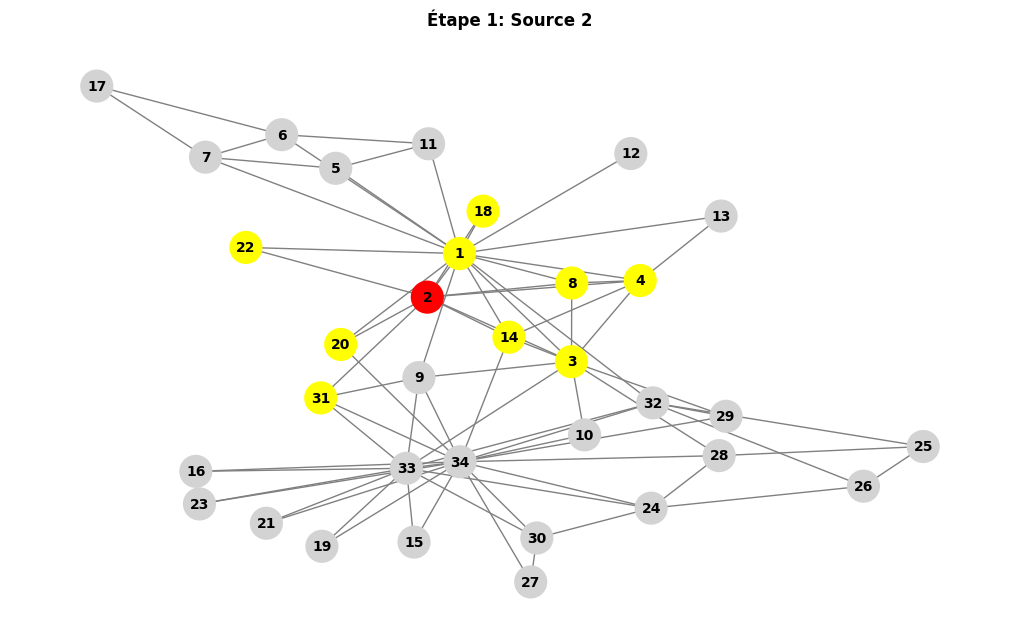

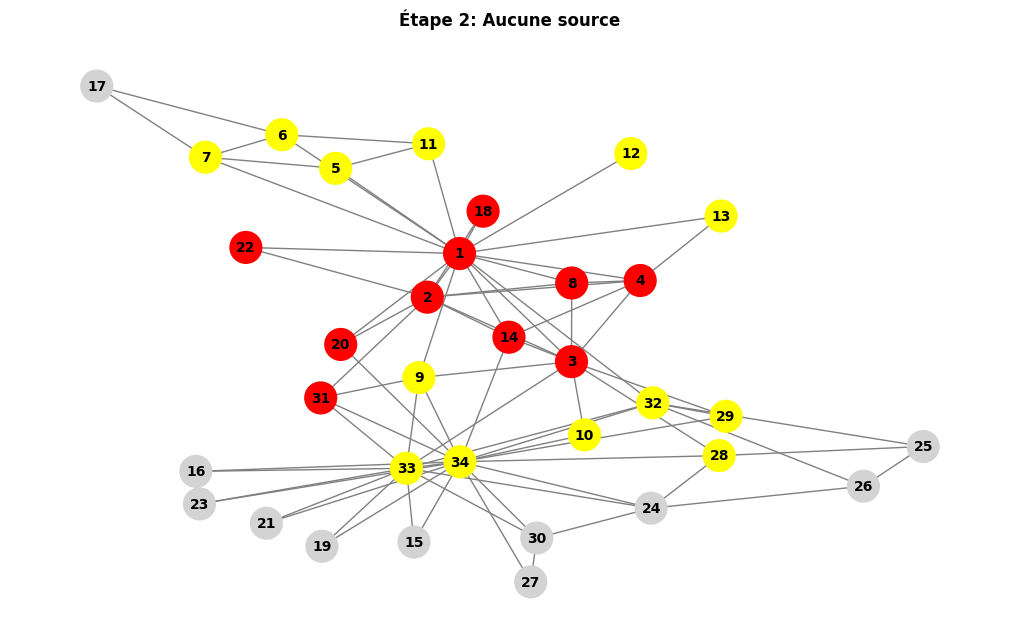

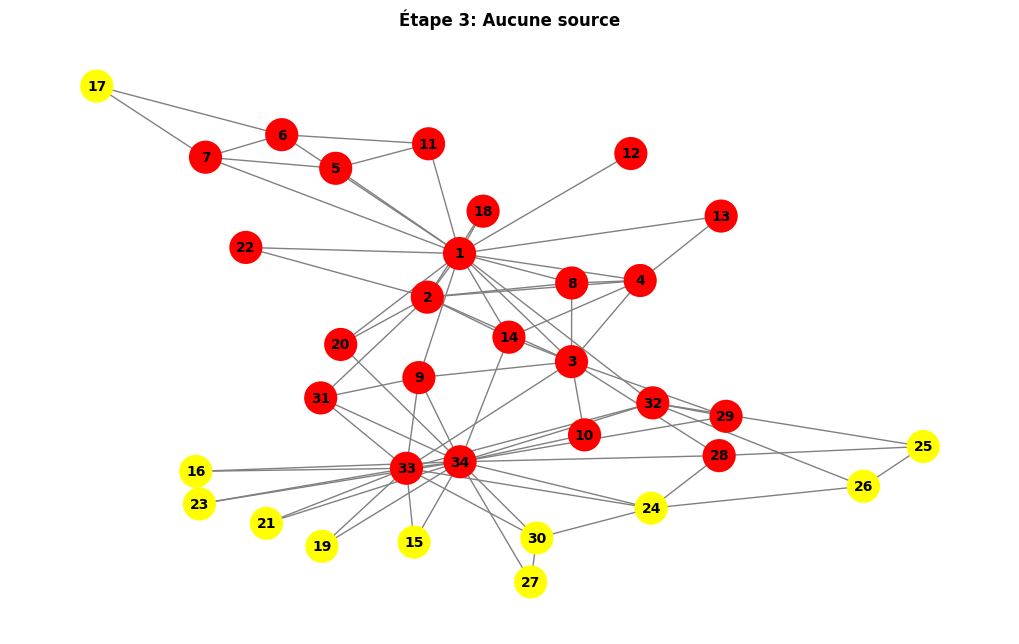

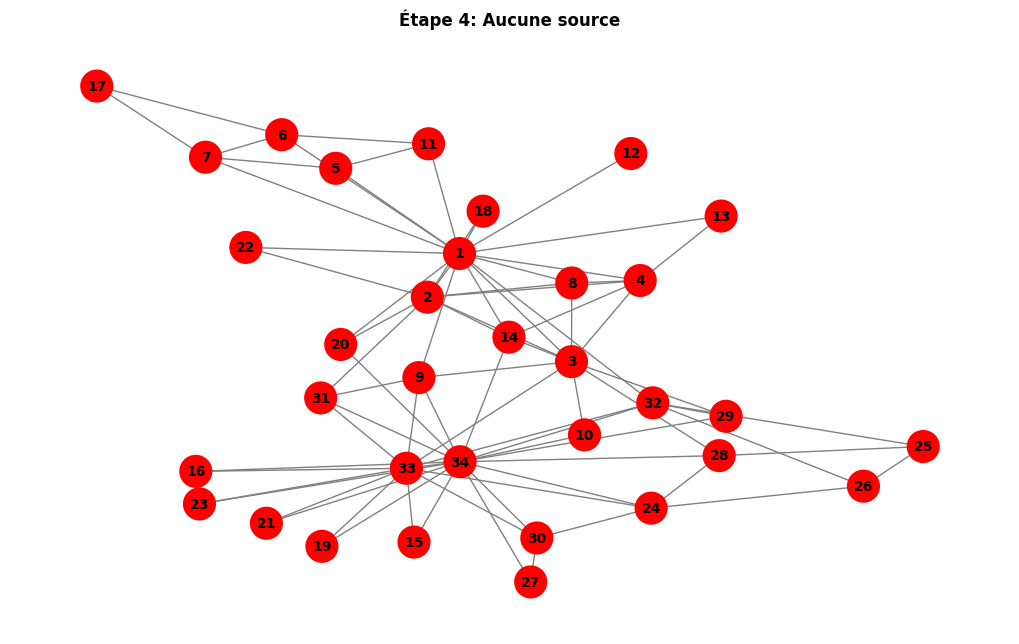

In [12]:
visualiser_graphe_par_etape(graphe, seq)


#### Mthd 2

In [13]:
#sequence = couverture_balle_beta(graphe)
if sequence:
    print("Solution optimale trouvée :", sequence)
    liste_triee = sorted(sequence, key=lambda x: x[1], reverse=True)
    centres = [centre for centre, rayon in liste_triee]
else:
    print("Aucune solution valide trouvée.")


Solution optimale trouvée : [(2, 3)]


---

# 2

In [14]:
# Définition des graphes à tester
graphes = {
    "Stranke94": lire_graphe(r'instances/Stranke94/Stranke94.mtx'),
    "mouse_visual-cortex_1": lire_graphe(r'instances/bn-mouse_visual-cortex_1/bn-mouse_visual-cortex_1.mtx'),
    "karate": lire_graphe(r'instances/karate/karate.mtx'),
    "Graphe Cycle": generate_cyclic_graph(16),
    "Graphe Chaine": generate_chain_graph(16),
    "Graphe Etoile": generate_spider_graph(0, leg_length=4, num_legs=5),
}

In [15]:
# Initialisation du tableau des résultats
resultats = []

# Parcours de chaque graphe
for nom, graphe in graphes.items():
    nb_sommets = len(graphe)
    nb_aretes = sum(len(v) for v in graphe.values()) // 2  # Division par 2 car graphe non orienté
    B_max = nb_sommets ** 0.5

    # Application des algorithmes
    etat_initial = {sommet: 0 for sommet in graphe}

    try:
        solver_result, cout_s = solver(graphe)
    except Exception as e:
        solver_result, cout_s = str(e)

    try:
        chemin, cout_ss  = solveur_gbp(graphe)
    except Exception as e:
        B, chemin = None, str(e)

    try:
        sommets_actifs_p, cout_p = recherche_profondeur(graphe, etat_initial)
    except Exception as e:
        sommets_actifs_p, cout_p = str(e), None

    try:
        sommets_actifs_l, cout_l = recherche_largeur(graphe, etat_initial)
    except Exception as e:
        sommets_actifs_l, cout_l = str(e), None

    #try:
    #    sequence_brulage = trouver_sequence_brulage(graphe)
    #    cout_b = max([rayon for centre, rayon in sequence_brulage])
    #except Exception as e:
    #    sequence_brulage = str(e)

    try:
        sequence_opt = couverture_balle_beta(graphe)
        cout_bb = max([rayon for centre, rayon in sequence_opt])
    except Exception as e:
        sequence_opt = str(e)
    
    # Ajout des résultats au tableau
    resultats.append({
        "Graphe": nom,
        "V": nb_sommets,
        "E": nb_aretes,
        "B_max": B_max,
        "Solveur 1": solver_result,
        "Cout S1": cout_s,
        "Solveur GBP": chemin,
        "Cout S2": cout_ss,
        "Recherche Profondeur": sommets_actifs_p,
        "Cout RP": cout_p,
        "Recherche Largeur": sommets_actifs_l,
        "Cout RL": cout_l,
        #"Sequence Brulage": sequence_brulage,
        #"Cout SB": cout_b + 1,
        "Sequence Optimale": sequence_opt,
        "Cout SO": cout_bb
    })


# Convertir en DataFrame et afficher
df = pd.DataFrame(resultats)

df

,Graphe,V,E,B_max,Solveur 1,Cout S1,Solveur GBP,Cout S2,Recherche Profondeur,Cout RP,Recherche Largeur,Cout RL,Sequence Optimale,Cout SO
0,Stranke94,10,21,3.162278,"[8, 5, 1, 7]",4,"[4, 5, 1]",3,"[3, 6]",3,"[3, 6]",3,"[(3, 3)]",3
1,mouse_visual-cortex_1,29,44,5.385165,"[18, 22, 7, 24, 27, 8]",6,"[12, 22, 15, 24]",4,"[9, 2, 1, 6]",4,"[1, 22, 2]",4,"[(28, 4), (10, 2)]",4
2,karate,34,78,5.830952,"[21, 32, 3, 29, 18, 16, 11]",7,"[1, 34, 3]",3,"[34, 1, 17]",3,"[1, 34]",3,"[(1, 3), (34, 2)]",3
3,Graphe Cycle,16,16,4.000000,"[4, 11, 14, 1, 3]",5,"[4, 11, 14, 1, 3]",5,"[0, 2, 4, 6, 8, 10]",6,"[0, 2, 6, 10]",5,"[(4, 5), (12, 4)]",5
4,Graphe Chaine,16,15,4.000000,"[4, 11, 14, 1, 3]",5,"[4, 11, 14, 1, 3]",5,"[1, 3, 5, 7, 9, 11, 13, 15]",8,"[0, 4, 10, 14]",5,"[(11, 5), (3, 4)]",5
5,Graphe Etoile,21,20,4.582576,"[2, 0, 11, 15, 1, 14]",6,"[0, 5, 16, 18, 1]",5,"[0, 2, 7, 12]",5,"[0, 2, 4, 8]",5,"[(0, 5)]",5


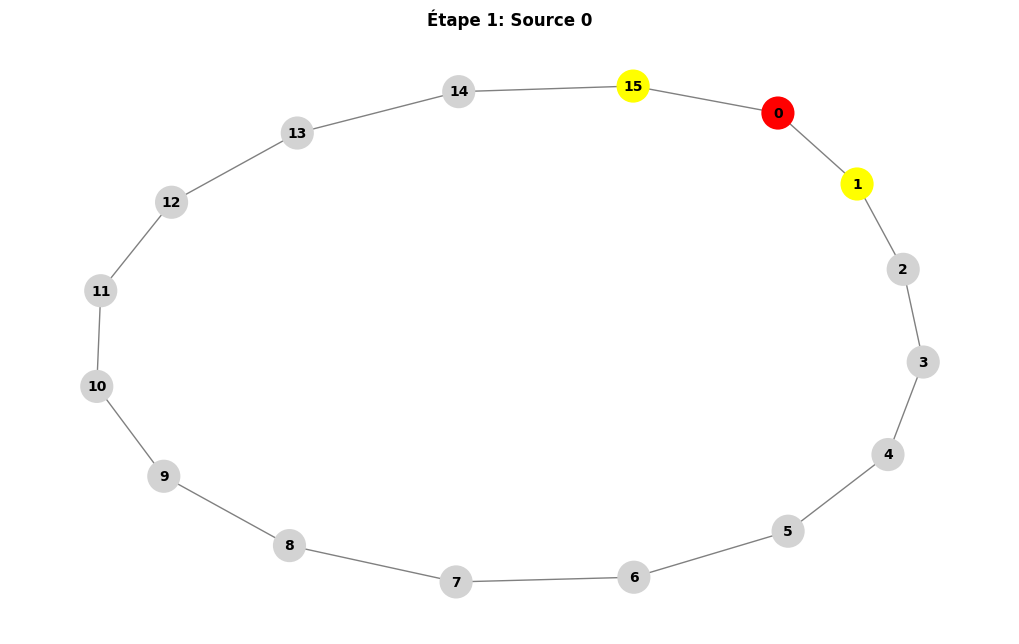

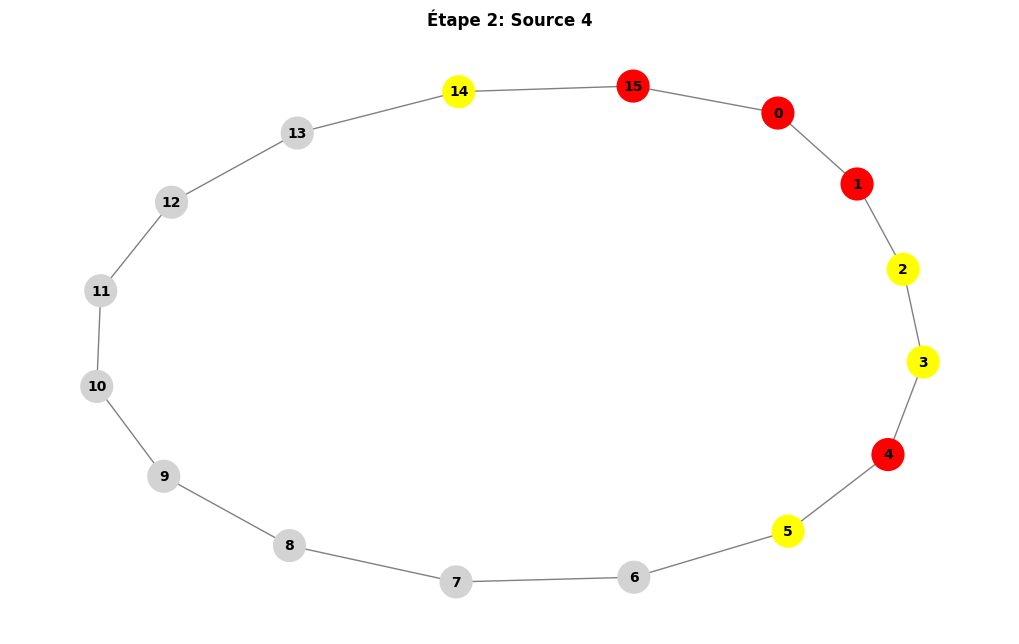

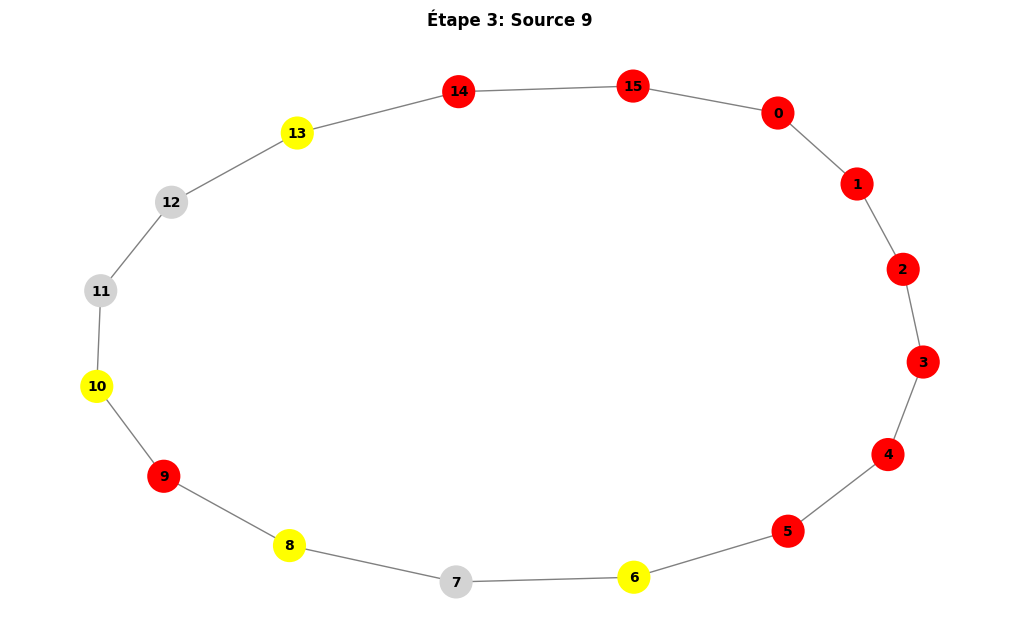

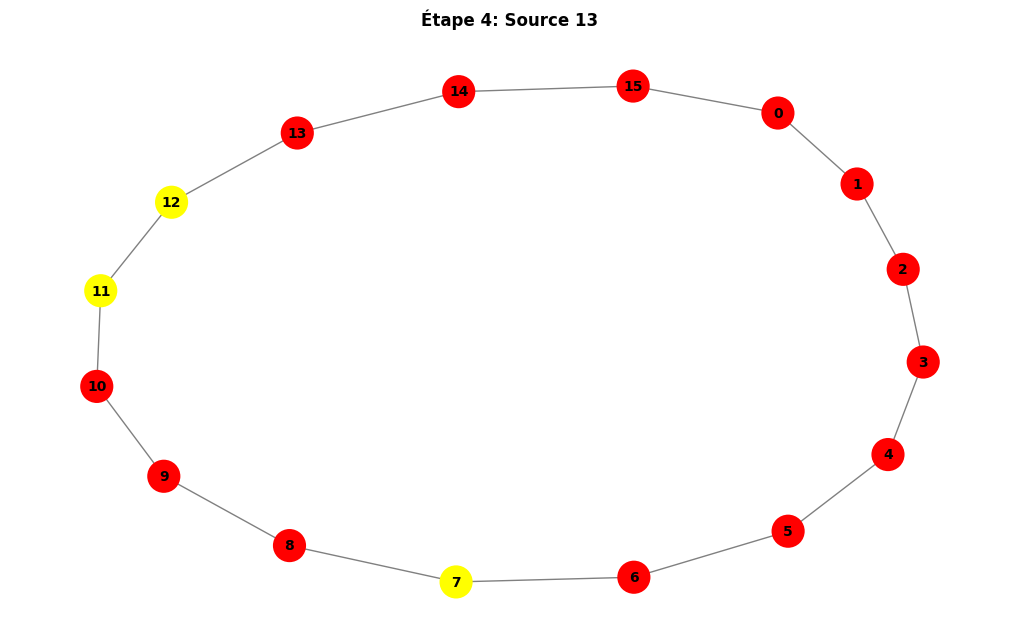

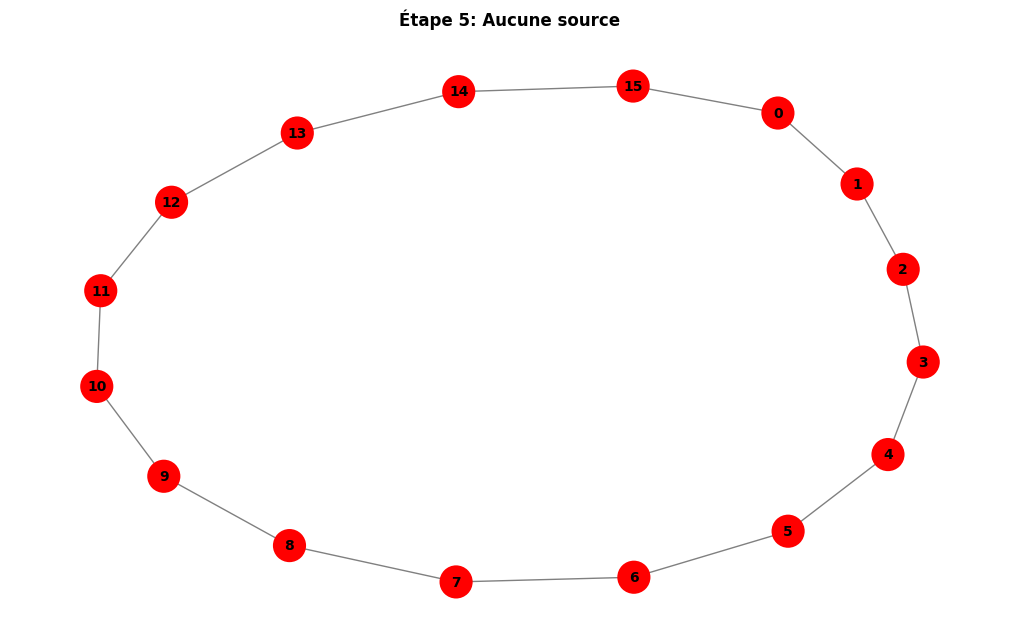

In [ ]:
num = 3
visualiser_graphe_par_etape(graphes[df.iloc[num]["Graphe"]], [centre for centre, rayon in df.iloc[num]["Sequence Optimale"]])
#visualiser_graphe_par_etape(graphes[df.iloc[num]["Graphe"]], [0, 4, 9, 13])
#visualiser_graphe_par_etape(graphes[df.iloc[num]["Graphe"]], df.iloc[num]["Recherche Profondeur"])